In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Define subset sizes
train_subset_size = 6000
test_subset_size = 6000


In [2]:

# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

Seed: 0, Epoch [1/5], Train Loss: 0.7986, Test Loss: 0.4600
Seed: 0, Epoch [2/5], Train Loss: 0.3121, Test Loss: 0.3979
Seed: 0, Epoch [3/5], Train Loss: 0.2382, Test Loss: 0.3342
Seed: 0, Epoch [4/5], Train Loss: 0.1893, Test Loss: 0.3190
Seed: 0, Epoch [5/5], Train Loss: 0.1550, Test Loss: 0.2973
Seed: 1, Epoch [1/5], Train Loss: 0.8101, Test Loss: 0.4599
Seed: 1, Epoch [2/5], Train Loss: 0.3109, Test Loss: 0.3905
Seed: 1, Epoch [3/5], Train Loss: 0.2376, Test Loss: 0.3347
Seed: 1, Epoch [4/5], Train Loss: 0.1906, Test Loss: 0.3045
Seed: 1, Epoch [5/5], Train Loss: 0.1536, Test Loss: 0.2929
Seed: 2, Epoch [1/5], Train Loss: 0.8097, Test Loss: 0.4476
Seed: 2, Epoch [2/5], Train Loss: 0.3114, Test Loss: 0.3751
Seed: 2, Epoch [3/5], Train Loss: 0.2427, Test Loss: 0.3452
Seed: 2, Epoch [4/5], Train Loss: 0.1917, Test Loss: 0.3047
Seed: 2, Epoch [5/5], Train Loss: 0.1547, Test Loss: 0.2872
Seed: 3, Epoch [1/5], Train Loss: 0.8177, Test Loss: 0.4551
Seed: 3, Epoch [2/5], Train Loss: 0.3134

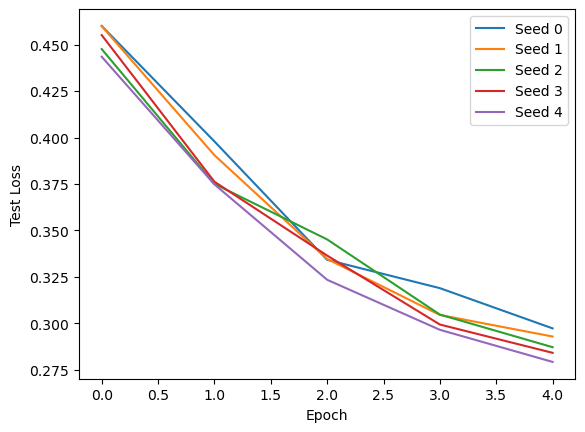

In [3]:


# MNIST dataset
full_train_dataset = torchvision.datasets.MNIST(root='./data/',
                                                train=True,
                                                transform=transforms.ToTensor(),
                                                download=True)
full_test_dataset = torchvision.datasets.MNIST(root='./data/',
                                               train=False,
                                               transform=transforms.ToTensor())


test_loss_per_seed = []
# Non-random versions of the code
for seed in [0, 1, 2, 3, 4]:
    torch.manual_seed(seed)

    # Create subsets of train and test datasets
    train_subset = torch.utils.data.Subset(full_train_dataset, range(train_subset_size))
    test_subset = torch.utils.data.Subset(full_test_dataset, range(test_subset_size))

    # Data loaders
    train_loader = torch.utils.data.DataLoader(dataset=train_subset,
                                               batch_size=batch_size,
                                               shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_subset,
                                              batch_size=batch_size,
                                              shuffle=False)

    # Fully connected neural network
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    total_step = len(train_loader)
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        # Train
        train_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_loss_list.append(train_loss)

        # Test
        test_loss = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.reshape(-1, input_size).to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        test_loss /= len(test_loader)
        test_loss_list.append(test_loss)
    

        # Print progress
        print(f'Seed: {seed}, Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    test_loss_per_seed.append(test_loss_list)

#plot of the test errors during training from the separate runs
plt.figure()
plt.plot(test_loss_per_seed[0], label='Seed 0')
plt.plot(test_loss_per_seed[1], label='Seed 1')
plt.plot(test_loss_per_seed[2], label='Seed 2')
plt.plot(test_loss_per_seed[3], label='Seed 3')
plt.plot(test_loss_per_seed[4], label='Seed 4')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()



In [4]:
final_errors_per_seed =[test_loss_per_seed[i][-1] for i in range(len(test_loss_per_seed))]
test_error_mean = np.mean(final_errors_per_seed)
test_error_std = np.std(final_errors_per_seed)
print(f'Test error mean: {test_error_mean:.4f}, Test error std: {test_error_std:.4f}')


Test error mean: 0.2882, Test error std: 0.0064
